In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [3]:
physical_devices = tf.config.list_physical_devices('GPU') 
try: 
  tf.config.experimental.set_memory_growth(physical_devices[0], True) 
except: 
  # Invalid device or cannot modify virtual devices once initialized. 
  pass 

In [4]:
data = pd.read_csv("data.txt", delimiter=' ', header=None, skiprows=1, names=['c1','c2','c3','c4','c5', 'c6'])
# data = pd.read_csv( 'data.txt' )
data.head()
# print(len(data))

c1     c2     c3     c4     c5      c6
0  47.88   8.39  49.29   6.31 -37.27  304.84
1  11.42 -46.21  -5.55 -15.94  25.05 -168.82
2  17.83   9.05  24.55 -42.49  37.12  196.37
3  41.77 -49.00 -42.52  37.32 -14.91 -296.75
4  34.34  -0.67  24.90  35.26  17.59   55.59

In [6]:
continuous_features = data[ ['c1','c2','c3','c4', 'c5'] ].values 
categorical_research_features = data[ [ 'c6' ] ].values 
print(categorical_research_features)

[[ 3.0484e+02]
 [-1.6882e+02]
 [ 1.9637e+02]
 [-2.9675e+02]
 [ 5.5590e+01]
 [-3.2720e+01]
 [-1.5987e+02]
 [ 9.5620e+01]
 [-3.2610e+01]
 [ 1.6500e+00]
 [-6.6800e+01]
 [-1.7530e+01]
 [ 9.9170e+01]
 [-6.2190e+01]
 [-3.2681e+02]
 [-1.4606e+02]
 [-2.3990e+01]
 [ 2.8430e+01]
 [ 3.3329e+02]
 [ 7.7730e+01]
 [-1.8539e+02]
 [-3.0680e+02]
 [-4.5440e+01]
 [ 2.7752e+02]
 [ 1.3441e+02]
 [ 1.8060e+02]
 [ 1.3710e+02]
 [ 8.3960e+01]
 [-1.2167e+02]
 [-3.0340e+01]
 [-1.3268e+02]
 [-2.2390e+02]
 [-3.1060e+01]
 [-3.5280e+01]
 [ 1.4107e+02]
 [ 3.7713e+02]
 [-2.5824e+02]
 [ 3.1610e+01]
 [-1.0945e+02]
 [-1.4264e+02]
 [-3.4190e+01]
 [ 2.0480e+02]
 [ 1.8443e+02]
 [ 3.8400e+00]
 [ 1.3539e+02]
 [-1.1000e-01]
 [ 8.9000e+01]
 [ 2.6861e+02]
 [ 1.9563e+02]
 [-2.4717e+02]
 [-2.6820e+01]
 [-1.5351e+02]
 [ 8.8240e+01]
 [ 1.9014e+02]
 [ 6.2510e+01]
 [ 6.6200e+00]
 [-1.3202e+02]
 [ 1.0840e+01]
 [ 1.0487e+02]
 [ 2.2648e+02]
 [-4.6040e+01]
 [-2.2070e+01]
 [-5.9470e+01]
 [ 1.7488e+02]
 [ 2.4937e+02]
 [-3.4967e+02]
 [ 2.7760e

In [5]:
X = np.concatenate( [ continuous_features , categorical_research_features ] , axis=1 )
Y = data[ [ 'c6' ] ].values

In [6]:
train_features , test_features ,train_labels, test_labels = train_test_split( X , Y , test_size=0.2 )


In [7]:
X = tf.constant( train_features , dtype=tf.float32 )
Y = tf.constant( train_labels , dtype=tf.float32 ) 

In [8]:
test_X = tf.constant( test_features , dtype=tf.float32 ) 
test_Y = tf.constant( test_labels , dtype=tf.float32 ) 

In [9]:
def mean_squared_error( Y , y_pred ):
    return tf.reduce_mean( tf.square( y_pred - Y ) )

def mean_squared_error_deriv( Y , y_pred ):
    return tf.reshape( tf.reduce_mean( 2 * ( y_pred - Y ) ) , [ 1 , 1 ] )
    
def h ( X , weights , bias ):
    return tf.tensordot( X , weights , axes=1 ) + bias

In [23]:
num_epochs = len(data) // 10
num_samples = X.shape[0]
batch_size = 10
learning_rate = 0.0001

dataset = tf.data.Dataset.from_tensor_slices(( X , Y )) 
dataset = dataset.shuffle( 500 ).repeat( num_epochs ).batch( batch_size )
iterator = dataset.__iter__()

In [24]:
num_features = X.shape[1]
weights = tf.random.normal( ( num_features , 1 ) ) 
bias = 0

epochs_plot = list()
loss_plot = list()

In [25]:

for i in range( num_epochs ) :
    
    epoch_loss = list()
    for b in range( int(num_samples/batch_size) ):
        x_batch , y_batch = iterator.get_next()
   
        output = h( x_batch , weights , bias ) 
        loss = epoch_loss.append( mean_squared_error( y_batch , output ).numpy() )
    
        dJ_dH = mean_squared_error_deriv( y_batch , output)
        dH_dW = x_batch
        dJ_dW = tf.reduce_mean( dJ_dH * dH_dW )
        dJ_dB = tf.reduce_mean( dJ_dH )
    
        weights -= ( learning_rate * dJ_dW )
        bias -= ( learning_rate * dJ_dB ) 
        
    loss = np.array( epoch_loss ).mean() * learning_rate /10
    epochs_plot.append( i + 1 )
    loss_plot.append( loss ) 
    
    print( 'Loss is {}'.format( loss ) ) 

Loss is 0.16169287109375002
Loss is 0.090983408203125
Loss is 0.08279404296875001
Loss is 0.08616626953125
Loss is 0.08162763671875001
Loss is 0.08766345703125
Loss is 0.081690986328125
Loss is 0.084854931640625
Loss is 0.082994501953125
Loss is 0.08563149414062501
Loss is 0.081559501953125
Loss is 0.08440568359375
Loss is 0.083180791015625
Loss is 0.08972898437500001
Loss is 0.08644189453125001
Loss is 0.09497825195312501
Loss is 0.0833454296875
Loss is 0.085583759765625
Loss is 0.08251263671875
Loss is 0.08783906250000001
Loss is 0.0818977880859375
Loss is 0.103772900390625
Loss is 0.08082375
Loss is 0.08027565917968751
Loss is 0.099618662109375
Loss is 0.08976505859375
Loss is 0.0818603466796875
Loss is 0.084036240234375
Loss is 0.08772526367187501
Loss is 0.08234892578125
Loss is 0.088304189453125
Loss is 0.075213427734375
Loss is 0.092783115234375
Loss is 0.0803984765625
Loss is 0.08039535156250001
Loss is 0.099879189453125
Loss is 0.0920480859375
Loss is 0.082180068359375
Loss is

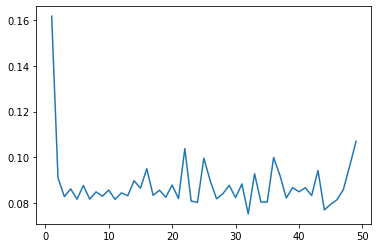

In [26]:
import matplotlib.pyplot as plt
plt.plot( epochs_plot , loss_plot ) 
plt.show()

In [27]:
output = h( test_X , weights , bias ) 
labels = test_Y

accuracy_op = tf.metrics.MeanAbsoluteError() 
accuracy_op.update_state( labels , output )
print( 'Mean Absolute Error = {}'.format( accuracy_op.result().numpy() * learning_rate *10 ) )

Mean Absolute Error = 0.06820314025878907
